In [1]:
import pandas as pd
import datetime as dt

# Yearly Oil Dataset: 1861 to 2021 #

### The following dataset was sourced from ourworldindata.org, and shows the average price of oil for each year since 1861. ###

In [3]:
df = pd.read_csv("../../../casestudy_data/group_2/crude-oil-prices-yearly.csv")
df.head

<bound method NDFrame.head of     Entity      Code  Year  Oil - Crude prices since 1861
0    World  OWID_WRL  1861                       0.490000
1    World  OWID_WRL  1862                       1.050000
2    World  OWID_WRL  1863                       3.150000
3    World  OWID_WRL  1864                       8.060000
4    World  OWID_WRL  1865                       6.590000
..     ...       ...   ...                            ...
154  World  OWID_WRL  2015                      52.386759
155  World  OWID_WRL  2016                      43.734170
156  World  OWID_WRL  2017                      54.192440
157  World  OWID_WRL  2018                      71.310060
158  World  OWID_WRL  2019                      64.210573

[159 rows x 4 columns]>

In [4]:
list(df.columns)

['Entity', 'Code', 'Year', 'Oil - Crude prices since 1861']

#### The entity and code columns are irrelevant here, so only Oil price and data columns need to be retained.####

In [5]:
df2 = df.rename(columns={'Oil - Crude prices since 1861':'Oil Price'})

In [6]:
#'Oil - Crude prices since 1861' is too long of a column heading.  It thus needs to be renamed to 'Year' for
#simplicity.

df2 = df2[['Year','Oil Price']]

In [7]:
df2

,Year,Oil Price
0,1861,0.490000
1,1862,1.050000
2,1863,3.150000
3,1864,8.060000
4,1865,6.590000
...,...,...
154,2015,52.386759
155,2016,43.734170
156,2017,54.192440
157,2018,71.310060


In [8]:
#to get a sense of how oil price is changing over time, using ggplot to vizualise becomes necessary.
from plotnine import ggplot, aes, geom_line, geom_bar, geom_point

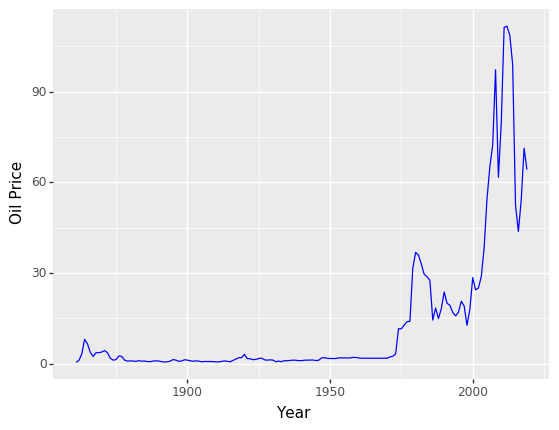

<ggplot: (-9223363243393650481)>

In [9]:
ggplot(df2) + aes(x='Year', y='Oil Price') + geom_line(colour='blue')

# Monthly Oil Dataset #

### This dataset was exported from the eia.gov website, and dates back to 1986.  While not as temporally extensive, the monthly scale provides some finer detail.  Oil prices can, have, and do fluctuate significantly enough to evaluate it at the montly level. ###

In [12]:
df3 = pd.read_csv("../../../casestudy_data/group_2/Monthly_Oil_Prices_EIA.csv")
print((df3.dtypes))
df3.head()

Date                                                    object
Cushing, OK WTI Spot Price FOB (Dollars per Barrel)    float64
dtype: object


,Date,"Cushing, OK WTI Spot Price FOB (Dollars per Barrel)"
0,Jan-1986,22.93
1,Feb-1986,15.46
2,Mar-1986,12.61
3,Apr-1986,12.84
4,May-1986,15.38


In [13]:
#The monthly price per barrel heading is far too long of a description to be useful.  Thus, simply renaming it to
#"Oil Price" is appropriate.

df3 = df3.rename(columns={'Cushing, OK WTI Spot Price FOB (Dollars per Barrel)':'Oil Price'})

In [14]:
#Date was originally brought in as an object datatype, which can't be read or used with libraries like ggplot.  Thus,
#we implement the to_datetime function to get the column into a usable format.

df3['Date'] = pd.to_datetime(df3['Date'])

In [15]:
df3.head()

,Date,Oil Price
0,1986-01-01,22.93
1,1986-02-01,15.46
2,1986-03-01,12.61
3,1986-04-01,12.84
4,1986-05-01,15.38


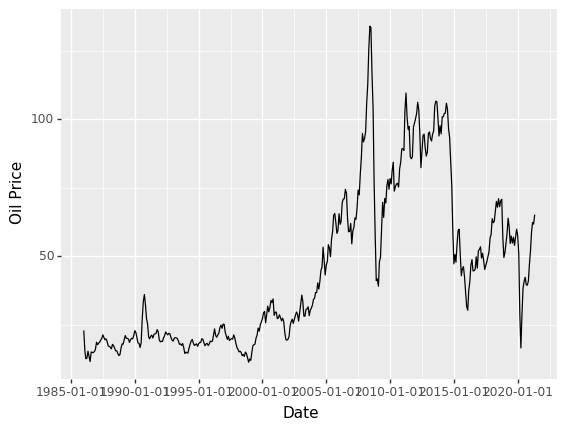

<ggplot: (8793453242481)>

In [16]:
ggplot(df3) + aes(x='Date',y='Oil Price') + geom_line()

In [17]:
#Severance taxes on oil production is 8% of the value of produced oil.  The taxes are collected at the state level,
#not the county level.

In [18]:
df3.to_csv('../../../casestudy_data/group_2/monthly_prices_refined.csv',index=False)

# NYMEX Oil Future Prices #

#### The New York Mercantile Exchange (NYMEX) is commodity futures exchange for lots of raw goods like beef, grain, and oil (just to name a few).  In case you're familiar with the New York Stock Exchange (NYSE), it works in a similar way.  The NYMEX is a place where a materials seller and buyer "meet" and agree on how much a product is worth, given how much supply and demand there is of and for the product.  These agreements are also known as settlements, and can go many years into the future.  In our case, the settlements go as far out as 2032. ####

#### You may be wondering, "why would either the buyer or the seller of a product agree on the volume and price of a commodity so far out?  If you're uncomfortable with uncertainty, the exchange market is very useful for reducing that, so that you can worry about other things than price fluctuations at a later time. The downside is that you miss out on times when the commodity gets hot. ####

In [19]:
df4 = pd.read_csv("../../../casestudy_data/group_2/future_prices.csv")

In [20]:
df4.head()

,Month,Quoted Price,Previous Settle,High,Low,Volume
0,JUL 2021,70.43,70.29,70.80,69.68,"170,058"
1,AUG 2021,70.20,70.09,70.54,69.47,"93,642"
2,SEP 2021,69.62,69.58,69.98,68.97,"56,844"
3,OCT 2021,68.87,68.89,69.26,68.31,"30,348"
4,NOV 2021,68.22,68.24,68.55,67.75,"13,249"


In [21]:
df4.dtypes

Month               object
Quoted Price        object
Previous Settle    float64
High                object
Low                 object
Volume              object
dtype: object

In [22]:
df4['Month'] = pd.to_datetime(df4['Month'])

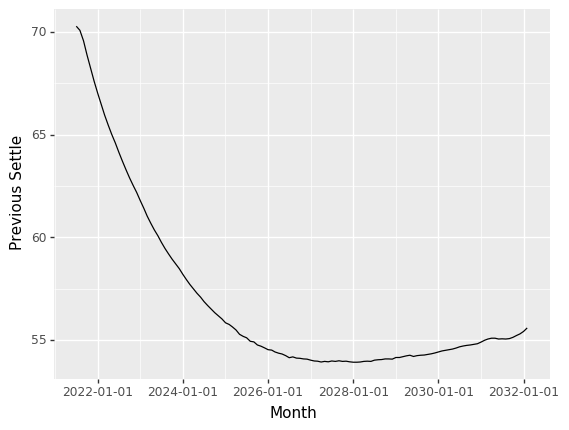

<ggplot: (8793448513214)>

In [23]:
ggplot(df4) + aes(x='Month',y='Previous Settle') + geom_line()

# Inflation Corrections to Pricing

##### One potential issue of looking at raw prices for a barrel of oil is that inflation hasn't been taken into account.  A dollar in 1914 is worth twenty-six dollars today.

##### First, we'll load yearly average inflation numbers that has been curated from the usinflationcalculator.com website.  The inflation factor number is the compounded inflation rate from this year to any prior year.  For example, the inflation rate for 2020 was 1.2%, which means that the value of a dollar was 101.2% of 2021's dollar.

In [24]:
inflation = pd.read_csv("../../../casestudy_data/group_2/inflation_correction.csv")
inflation.tail()

,YEAR,Average Yr Inf,Inflation Factor
102,2016,1.3,1.091
103,2017,2.1,1.077
104,2018,2.4,1.055
105,2019,1.8,1.030
106,2020,1.2,1.012


In [25]:
#Next, we'll correct yearly oil prices to today's dollar by joining the yearly oil price and inflation datasets.
Yearly_Price_InfCorr = df2.join(inflation.set_index('YEAR'), on='Year')

In [26]:
#The correction itself involves multiplying the oil price for a given year and the associated inflation factor.
Yearly_Price_InfCorr['IC Oil Price'] = Yearly_Price_InfCorr['Oil Price']*Yearly_Price_InfCorr['Inflation Factor']

In [27]:
#There are some n/a values for years that we don't have oil prices (all before 1914).  We'll drop them from the newly
#combined dataset.
Yearly_Price_InfCorr=Yearly_Price_InfCorr.dropna()

In [28]:
Yearly_Price_InfCorr.head()

,Year,Oil Price,Average Yr Inf,Inflation Factor,IC Oil Price
53,1914,0.81,1.0,26.106,21.14586
54,1915,0.64,1.0,25.847,16.54208
55,1916,1.10,7.9,25.592,28.15120
56,1917,1.56,17.4,23.718,37.00008
57,1918,1.98,18.0,20.203,40.00194


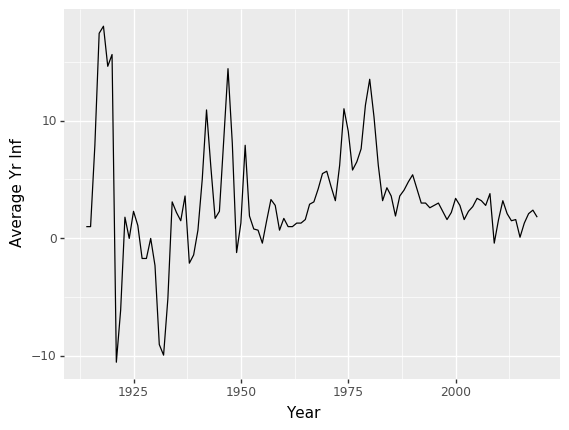

<ggplot: (-9223363243406258677)>

In [29]:
ggplot(Yearly_Price_InfCorr) + aes(x='Year', y='Average Yr Inf') + geom_line()

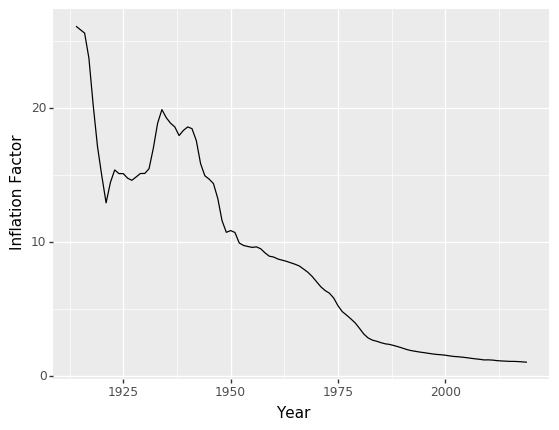

<ggplot: (8793461113285)>

In [30]:
ggplot(Yearly_Price_InfCorr) + aes(x='Year', y='Inflation Factor') + geom_line()

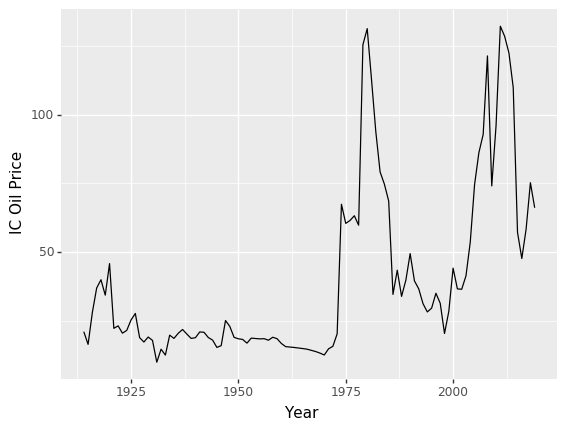

<ggplot: (-9223363243448861629)>

In [31]:
#now we can see what the price of oil is over time with inflation taken into account.
ggplot(Yearly_Price_InfCorr) + aes(x='Year',y='IC Oil Price') + geom_line()

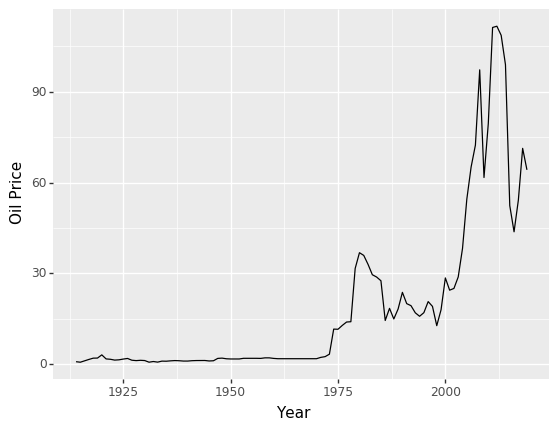

<ggplot: (-9223363243448875334)>

In [32]:
#for reference, here was the non-adjusted oil prices over time.
ggplot(Yearly_Price_InfCorr) + aes(x='Year',y='Oil Price') + geom_line()

#### As you can see from the last two graphs above, inflation makes a big difference when looking back historical commodity prices.  In 1980, the price of oil was 30USD, which doesn't sound like a lot.  But when inflation is taken into account, that 30USD is worth over 125USD today!  That price spike led to substantial drilling and production in the early 1980's, which was subsequently followed by a price collapse

In [33]:
Yearly_Price_InfCorr.to_csv('../../../casestudy_data/group_2/Inflation_Corrected_Oil_Prices_Yearly.csv',index=False)